## 📦 Importing Libraries

We'll start by importing all the essential Python libraries needed for working with images, building an SVM classifier, and visualizing results.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA



## 📂 Loading the dataset
We’ll now move on to loading the credit card fraud dataset and taking a quick look at the structure to understand its shape and contents.


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

# Display first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 🧾 Check for missing values and basic dataset info
We'll inspect datatypes, missing values, and the general shape of our data.


In [3]:
# Shape and info
print(f"Dataset Shape: {df.shape}")
df.info()

# Check for missing values
df.isnull().sum()


Dataset Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## ⚖️ Let's check for class imbalance
In fraud detection, class imbalance is a major challenge—usually, fraudulent cases are very rare compared to genuine ones.


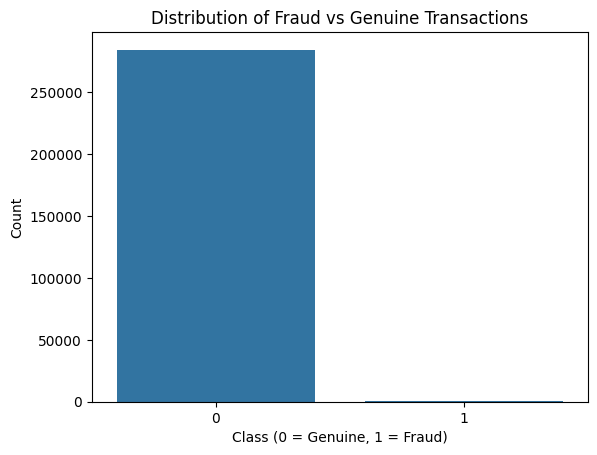

,proportion
Class,
0,0.998273
1,0.001727


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='Class', data=df)
plt.title("Distribution of Fraud vs Genuine Transactions")
plt.xlabel("Class (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Actual numbers
df['Class'].value_counts(normalize=True)


## 🔗 Let's see how features are correlated
Correlation heatmaps help identify redundant or influential features.


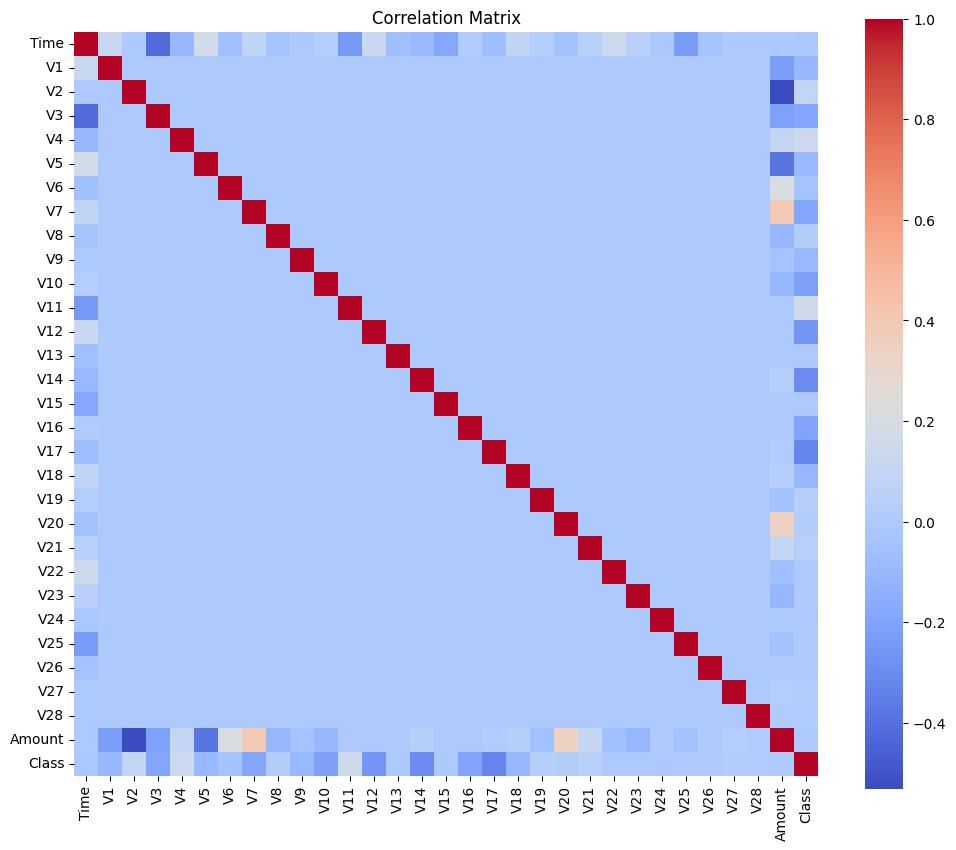

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix")
plt.show()


## ✂️ Let's split the dataset
We’ll separate the features from the target variable and split the data into training and testing sets for model validation.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (227845, 30), Test set: (56962, 30)


## 🌳 Let's train a Random Forest model
Random Forest is a powerful ensemble method that’s often effective even with imbalanced datasets.


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📊 Let’s evaluate our model
We’ll use accuracy, precision, recall, F1-score and a confusion matrix to evaluate performance.


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred = rf.predict(X_test)

# Metrics
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.9995962220427653

📄 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



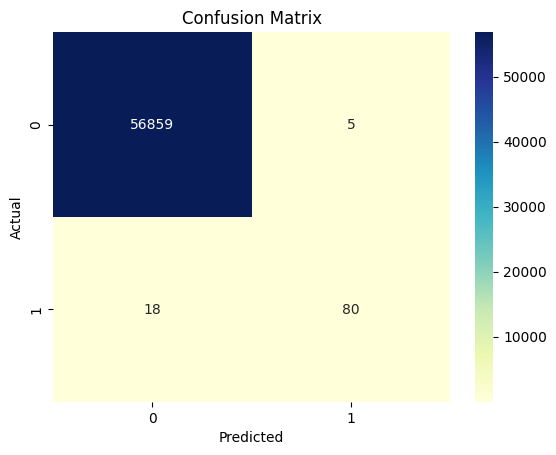

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 🌟 Feature importance
Let’s see which features were most useful for detecting fraud.


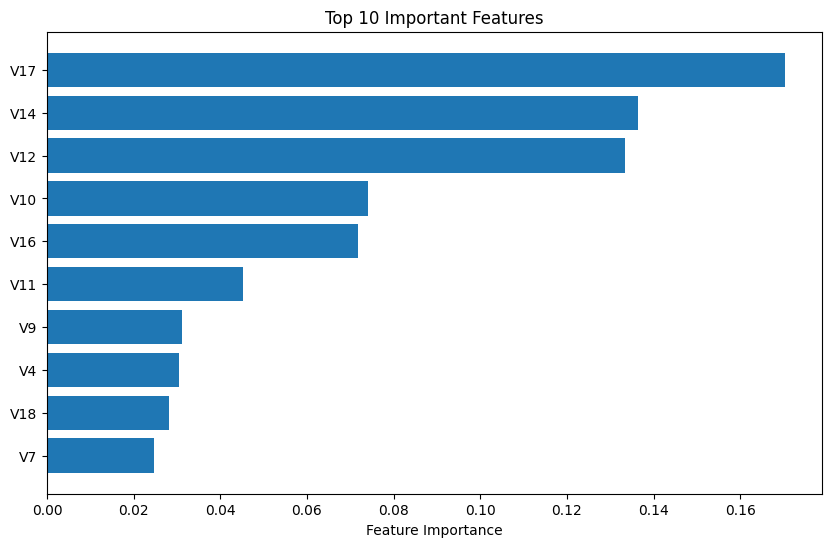

In [10]:
import numpy as np

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


## 💾 Save the trained model for future use
We'll use joblib to save the model.


In [11]:
import joblib

joblib.dump(rf, "random_forest_fraud_model.pkl")
print("✅ Model saved as random_forest_fraud_model.pkl")


✅ Model saved as random_forest_fraud_model.pkl
